In [1]:
# Practica 8
# Miguel Alfonso Zapata 
import matplotlib.pyplot as plt 
import numpy as np 

<img src= 'practica8_tex_page-0001.jpg' width="600px"> 

<img src= 'practica8_tex_page-0002.jpg' width="600px"> 

In [7]:
# First we need to create a MCMC function

def function_mcmc(sigm, iter, t_function, theta_init):
    samp = list()
    n = 0
    
    while n < iter: # we need to eveluate the initial value 
        chi = t_function(theta_init)
        theta = theta_init + np.random.normal(0, sigm) 
        x = t_function(theta) #using the thetas for eveluate the target function
        rad = x/chi #this is the MH radio 
        random = np.random.uniform(0,1)
        if random <= rad:
            n+=1
            samp.append(theta)
            theta_init = theta
    return samp


## Exercise 2: Gelman-Rubin convergence 
# first we create the the avoid list 
list_res = []
# next, we create the gaussia distribution with the specification 
mu = 5
sigm_g =1

def dist_gauss(x):
    return np.exp(-(x - mu)**2 / (2*(sigm_g**2)))/(np.sqrt(2*np.pi*(sigm_g**2)))

(0.4933081067171595, 9.01015902910476)

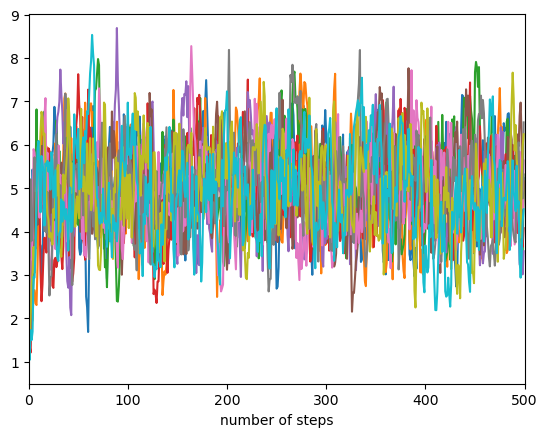

In [33]:
N_c = 10 # the number of the chains
N_s = 500 # number of steps

for i in range(N_c):
    chain = function_mcmc(1, N_s, dist_gauss, 1)
    list_res.append(chain)



# now we plot the chains 
for l in range(N_c):
    plt.plot(list_res[l],'-')
plt.xlabel('number of steps')
plt.xlim(0,N_s)
plt.ylim(np.min(list_res),np.max(list_res))


Text(0.5, 0, 'number of steps')

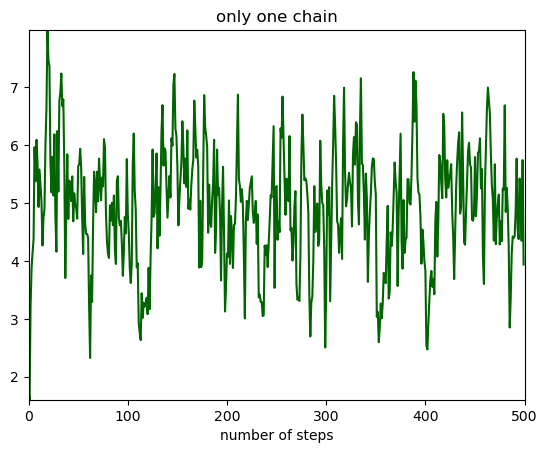

In [34]:
# now we do the same for only one chain, for this note that
c_1 = function_mcmc(1, N_s, dist_gauss, 1)
plt.plot(c_1,'-',color='darkgreen')
plt.xlim(0,N_s)
plt.title('only one chain')
plt.ylim(min(c_1),max(c_1))
plt.xlabel('number of steps')


In [35]:
# for use the Gelman - Rubin estimator we need to crerate the function, note that
def estimator_gr(par):
    list_res=list()
    for i in range(len(par)): #here we burn the first half
        list_res.append(par[i][250:])
    M, M_5  = len(list_res), len(list_res[5]) 
    # the arrays ar the following
    arr_mean, arr_var,glob_mean_arr  = [np.mean(list_res[i]) for i in range(M)], [np.std(list_res[i]) for i in range(M)], np.mean(list_res)
    k = 0
    for i in range(M):
        k += M_5/(M-1)*((arr_mean[i] - glob_mean_arr)**2)
    W_gr = np.mean(arr_var)
    V = (M_5-1)*W_gr/M_5 + (M+1)*k/(M*M_5)
    R_gr = np.sqrt(V/W_gr)
    return R_gr 

# finally we use the estimator for the 10 chains 
R_10 = estimator_gr(list_res)
print(f'The GR estimator is (10): {R_10}')
# and we do the same for 20 chains, note that 
list_res_c20 = []
N_20 = 20
for i in range(N_20):
    c_20 = function_mcmc(5, N_s, dist_gauss, -10)
    list_res_c20.append(c_20)
GR20 = estimator_gr(list_res_c20)
print(f'The GR estimator is (20): {GR20}')

The GR estimator is (10): 1.0077512380225744
The GR estimator is (20): 1.0009609692528498
